# Feature Validation - Days Since
This notebook is meant to validate features engineering to measure duration

Features of interest
- `days_since_first_transaction`
- `days_since_last_transaction`
- `days_since_first_tire_purchase`
- `days_since_last_tire_purchase`

In [ ]:
# importing needed packages
import pandas as pd
import numpy as np

In [ ]:
# review full duration dataset
df = pd.read_csv('fe_data/2015_18_10.csv')

In [ ]:
# preview
df

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
0,251635131.0,8,487.75,1,7,0,1301,198,911.0,911.0,1,NaN,779,0.000769
1,251636073.0,19,2656.93,4,15,0,1242,3,337.0,337.0,3,NaN,349711,0.003221
2,251636235.0,1,0.00,0,1,0,1239,1239,-1.0,-1.0,1,NaN,13420,0.000000
3,251636752.0,11,1678.38,1,10,0,1068,65,1068.0,1068.0,2,NaN,22365,0.000936
4,251638270.0,11,678.87,3,8,0,1233,895,1119.0,907.0,3,NaN,17140,0.002433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82954,654009201.0,6,1252.52,1,5,0,1308,225,225.0,225.0,1,NaN,29815,0.000765
82955,654197901.0,9,478.84,2,7,0,1298,147,701.0,316.0,1,NaN,20370,0.001541
82956,654387841.0,3,27.22,1,2,0,1059,760,760.0,760.0,1,NaN,25380,0.000944
82957,654580123.0,15,1294.46,2,13,0,1238,118,601.0,448.0,2,NaN,17396,0.001616


## Distributions / Ranges

array([[<AxesSubplot:title={'center':'days_since_first_transaction'}>]],
      dtype=object)

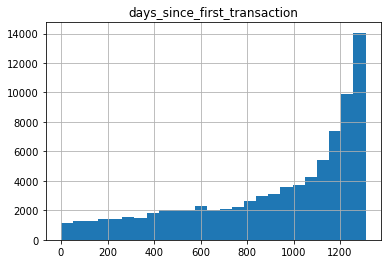

In [ ]:
# histogram
df.hist(column='days_since_first_transaction', bins=25)

array([[<AxesSubplot:title={'center':'days_since_last_transaction'}>]],
      dtype=object)

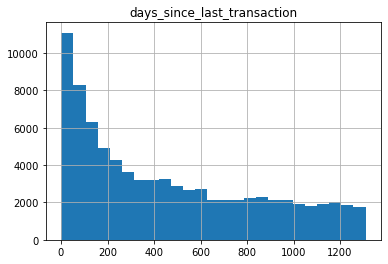

In [ ]:
# histogram
df.hist(column='days_since_last_transaction', bins=25)

array([[<AxesSubplot:title={'center':'days_since_first_tire_purchase'}>]],
      dtype=object)

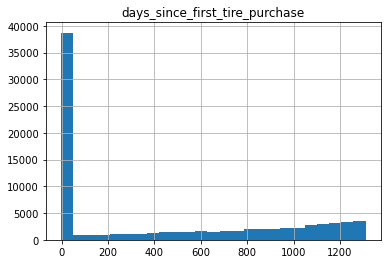

In [ ]:
# days_since_first_tire_purchase histogram
df.hist(column='days_since_first_tire_purchase', bins=25)

array([[<AxesSubplot:title={'center':'days_since_first_tire_purchase'}>]],
      dtype=object)

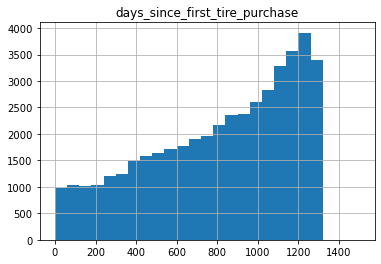

In [ ]:
# days_since_first_tire_purchase histogram (excluding -1)
df.hist(column='days_since_first_tire_purchase', bins=25, range=(0, 1500))

array([[<AxesSubplot:title={'center':'days_since_last_tire_purchase'}>]],
      dtype=object)

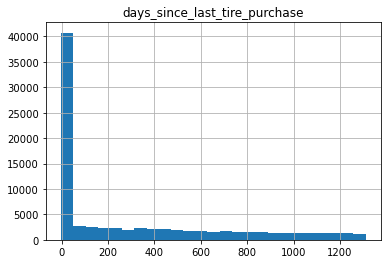

In [ ]:
# days_since_last_tire_purchase histogram
df.hist(column='days_since_last_tire_purchase', bins=25)

array([[<AxesSubplot:title={'center':'days_since_last_tire_purchase'}>]],
      dtype=object)

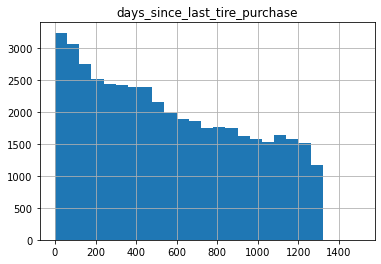

In [ ]:
# days_since_last_tire_purchase histogram (excluding -1)
df.hist(column='days_since_last_tire_purchase', bins=25, range=(0, 1500))

## Data Comparisons by Customer

In [ ]:
# days since first tire transaction <= first transaction
df['first_tire_valid'] = np.where(df['days_since_first_tire_purchase'] <= df['days_since_first_transaction'], True, False)

In [ ]:
df.loc[df['first_tire_valid'] == False]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq,first_tire_valid


In [ ]:
# last tire transaction <= last transaction
df['last_tire_valid'] = np.where((df['days_since_last_tire_purchase'] >= df['days_since_last_transaction']), True, False)
df['last_tire_valid'] = np.where((df['days_since_last_tire_purchase'] == -1), True, df['last_tire_valid'])

In [ ]:
df.loc[df['last_tire_valid'] == False]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq,first_tire_valid,last_tire_valid


## Conclusions
- `days_since` figures seem reasonable

## Ideas for New Features

`days_since` measures
- for service and other product categories

`days_between` measures
- first transaction, last transaction
- first tire, second tire
- first transaction, first tire

`frequency` measures
- any transaction frequency
- tire vs transaction frequency

`seasonal` measures
- purchases for each month (12 features)